In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
import torch
import torch.nn as nn

# Random Input

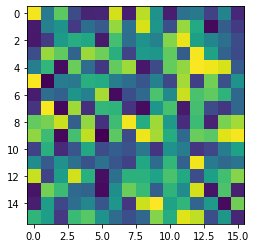

In [2]:
input_ = np.random.randint(0,255,size=(16,16))
plt.imshow(input_)
plt.show()

# Radial Kernel
On axis: +\
Off axis: -


In [3]:
window = np.zeros((5,5)) # initialize window

cr = 2
cc = 2
for i,j in product(range(5),range(5)):
    d = abs(cr-i) + abs(cc-j) # Manhattan distance
    window[i,j] = -0.375 * d + 1

window

array([[-0.5  , -0.125,  0.25 , -0.125, -0.5  ],
       [-0.125,  0.25 ,  0.625,  0.25 , -0.125],
       [ 0.25 ,  0.625,  1.   ,  0.625,  0.25 ],
       [-0.125,  0.25 ,  0.625,  0.25 , -0.125],
       [-0.5  , -0.125,  0.25 , -0.125, -0.5  ]])

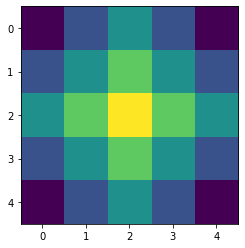

In [4]:
plt.imshow(window)
plt.show()

# Convolution

In [5]:
with torch.no_grad():
    conv = nn.Conv2d(1,1,(5,5),padding=2,bias=False,padding_mode='zeros')
    conv.weight = nn.Parameter(torch.tensor(window.reshape(1,1,*window.shape),dtype=torch.float32))
    input_tensor = torch.tensor(input_.reshape(1,1,*input_.shape),dtype=torch.float32)
    P = conv(input_tensor).numpy().reshape(*input_.shape)

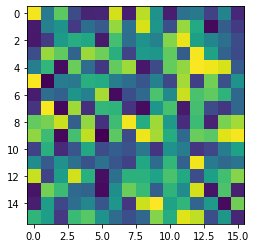

In [6]:
plt.imshow(input_)
plt.show()

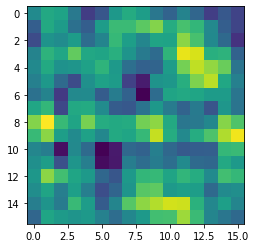

In [7]:
plt.imshow(P)
plt.show()